<a href="https://colab.research.google.com/github/Nastiiasaenko/Week-3XAI/blob/main/Week_3_XAI_Anastasiia_Saenko.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook we are working with a dataset from a telecom company trying to understand what factors contribute to customers churning. Churn refers to a commonly used metric in business and product analytics - percent of customers who stop using a product after a certain period of time.

## Here is the outline of analysis.

1. **Part 1 - understanding the dataset and exploratory data analysis (EDA)**

In this part we will explore how different customer characteristics impact churning rate and explore different aspects of the dataset. In this part we will also check the dataset for common assumptions to determine whether or not we can use certain type of models for the analysis.

2. **Part 2 - modeling with explainable models**
In this part we will use the models we evaluated assumptions for in the first part:

* Linear Regression

* Logistic Regression

* GAM (Generalized Additive Model) -

3. **Part 3 - model comparison**

In this part we will compare the model performance and recommend which ones are more suitable for this task.

# Part 1. Data and EDA

We are using a dataset containing customer information of a certain telecom company.

The dataset and its description can be found [here on Kaggle](https://www.kaggle.com/datasets/blastchar/telco-customer-churn/data).

Following the description from the original customer competition:

**Content**
Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

**The data set includes information about:**

* Customers who left within the last month – the column is called Churn
* Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
* Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
* Demographic info about customers – gender, age range, and if they have partners and dependents



## Imports for the notebook

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from scipy import stats

Downloading the dataset

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Nastiiasaenko/Week-3XAI/refs/heads/main/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [ ]:
df.shape

(7043, 21)

We have data on 7043 customers with 21 features.

Step 2 - recode and clean the data.

In [ ]:
# Check for null values
df.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

**Data cleaning**

In [ ]:
# Convert TotalCharges to numeric, forcing errors to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Check for NaN values in TotalCharges after conversion
missing_total_charges = df['TotalCharges'].isnull().sum()

# Filling missing values in TotalCharges with the median
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

# Verify the conversion
df['TotalCharges'].dtype, missing_total_charges


(dtype('float64'), 11)

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


## Exploratory Data Analysis

Before jumping to check assumptions for each model let's explore relationships betweeen variables (customer characteristics) and our target variable (churn). Since most of the variables are categorical we can't access all features and target variable in terms of their correlation but rather we will look at the distributions of variables.

But we will start with analysing the numeric variables - for example, the price of services can be a crucial factor in churn.

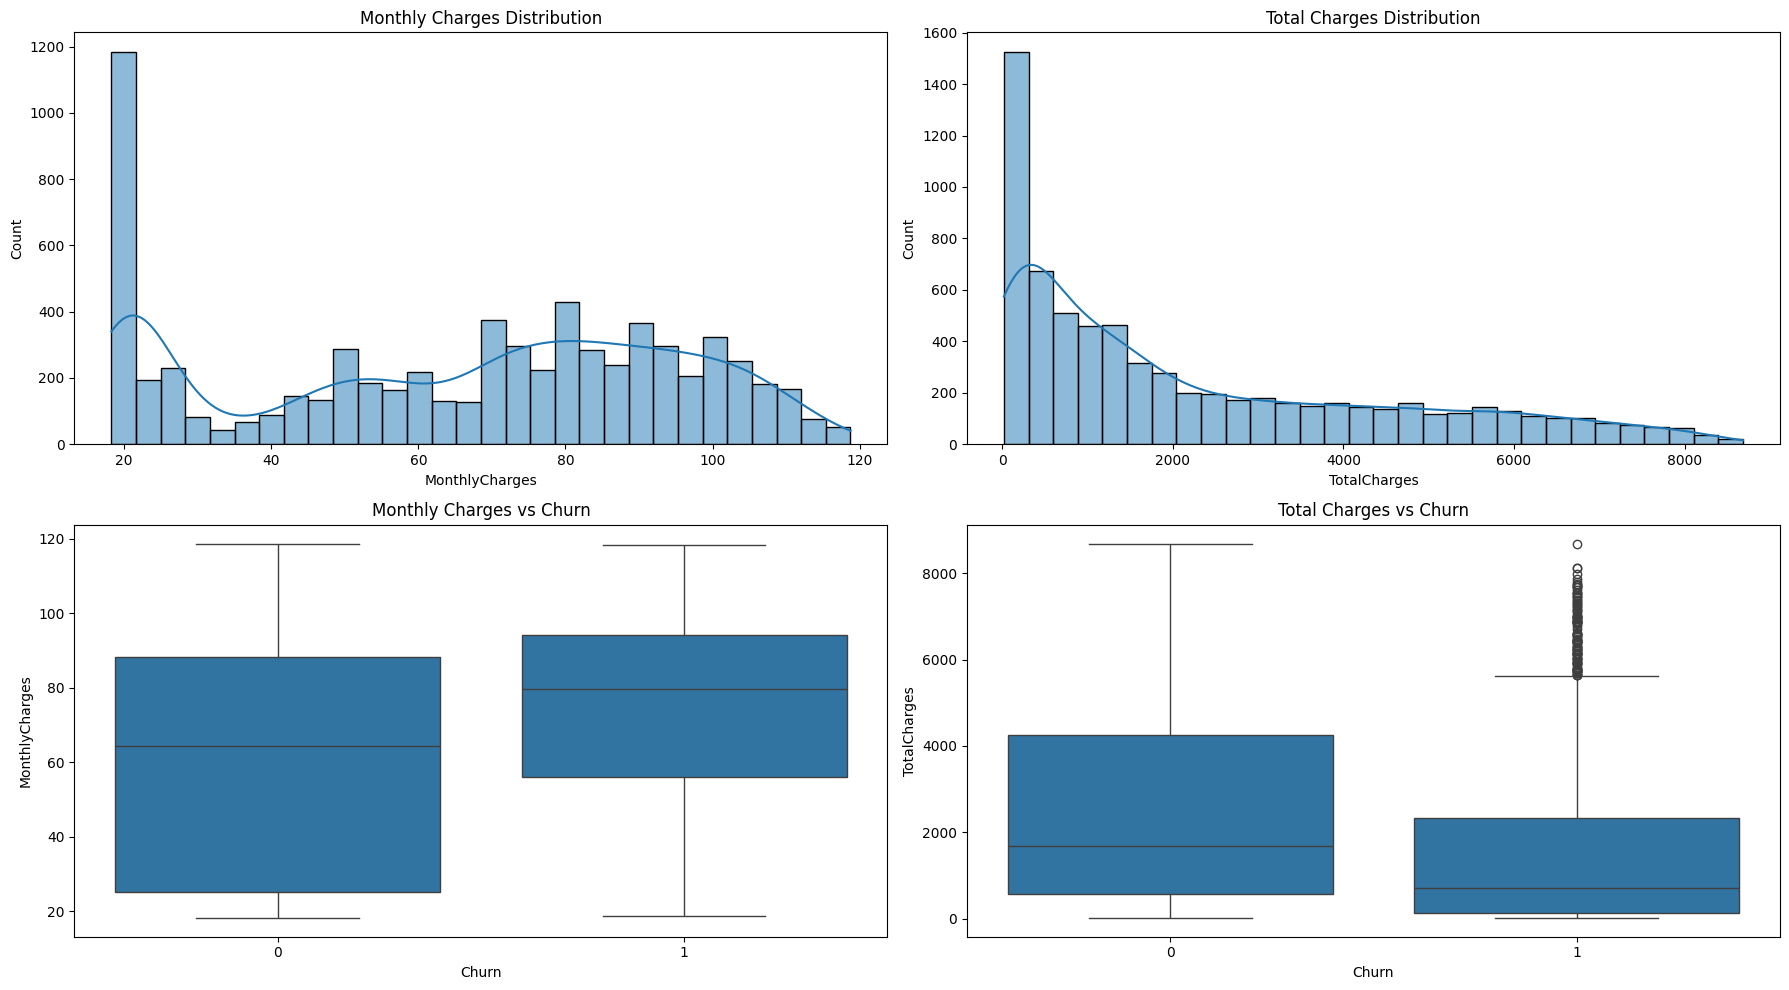

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the canvas for multiple plots
plt.figure(figsize=(18, 10))

# Visualizing the distribution of numerical variables
plt.subplot(2, 2, 1)
sns.histplot(df['MonthlyCharges'], kde=True, bins=30)
plt.title('Monthly Charges Distribution')

plt.subplot(2, 2, 2)
sns.histplot(df['TotalCharges'], kde=True, bins=30)
plt.title('Total Charges Distribution')

plt.subplot(2, 2, 3)
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Monthly Charges vs Churn')

plt.subplot(2, 2, 4)
sns.boxplot(x='Churn', y='TotalCharges', data=df)
plt.title('Total Charges vs Churn')

plt.tight_layout()
plt.show()



### What can we say about how monthly charges or price for services impacts the churn?

Customers who churn tend to have higher MonthlyCharges compared to those who stay, as shown in the box plot.

<ipython-input-104-78b01989550b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical_df['Churn'] = numerical_df['Churn'].astype(int)


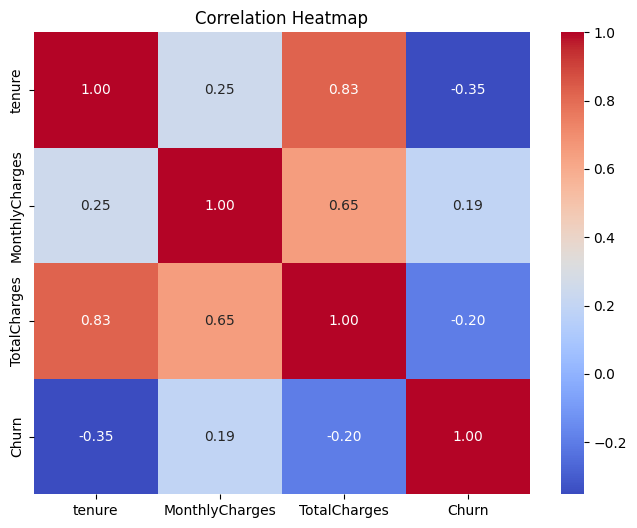

In [ ]:
# Correlation heatmap for numerical variables
numerical_df = df[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']]
numerical_df['Churn'] = numerical_df['Churn'].astype(int)

plt.figure(figsize=(8, 6))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


**Initial thoughts on numeric features and churn**

* We can see that most features are negatively correlated with the Churn probability but the multitude of the correlation isn't very high. (For tenure and Total Churn)

* Monthly churn is positively correlated but correlation isn't too high.

Since none correlations appear to be significant we can't really say anything if anything in particular has impact on churn.

## Now we will look at distributions for categorical variables and see if there is anything highly related to churn.

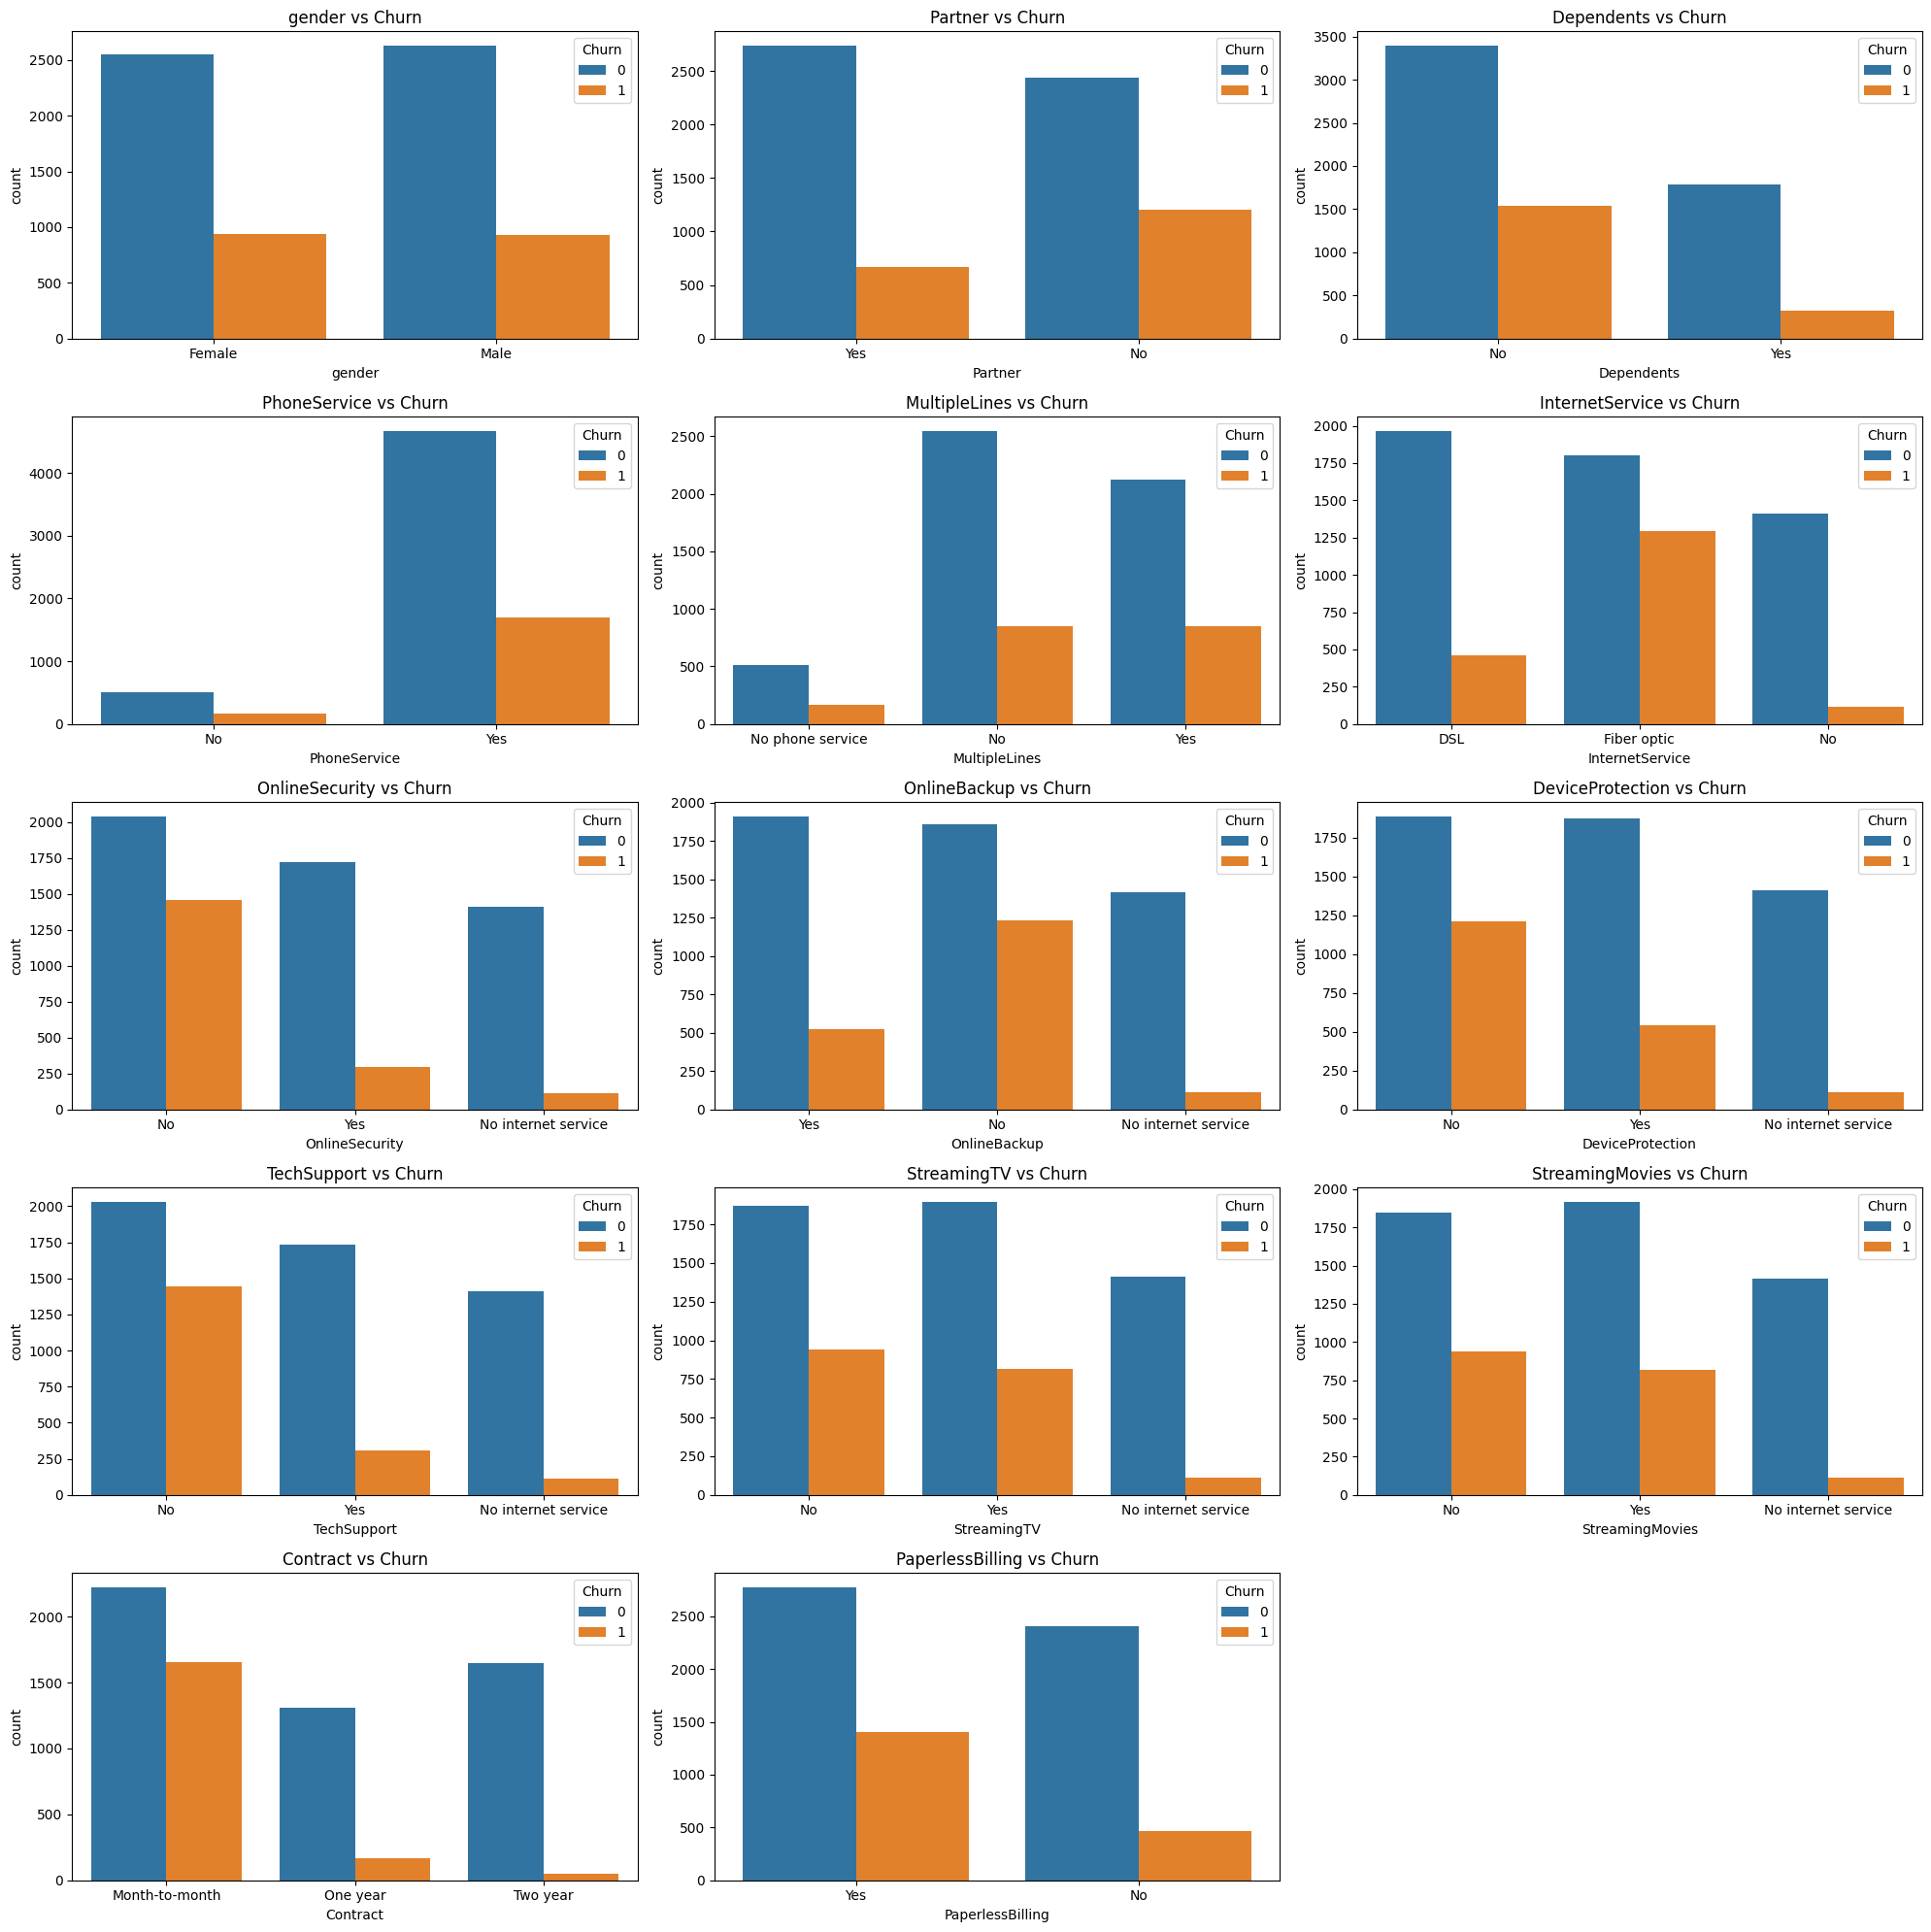

In [ ]:
# Checking the relationships between the categorical variables and the target (Churn)
import matplotlib.pyplot as plt
import seaborn as sns

# Categorical columns that were mapped
categorical_columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
                       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
                       'StreamingMovies', 'Contract', 'PaperlessBilling']

# Set up the canvas for multiple bar plots
plt.figure(figsize=(20, 20))

# Plotting each categorical variable against Churn
for i, col in enumerate(categorical_columns):
    plt.subplot(5, 3, i + 1)
    sns.countplot(x=col, hue='Churn', data=df)
    plt.title(f'{col} vs Churn')

plt.tight_layout()
plt.show()


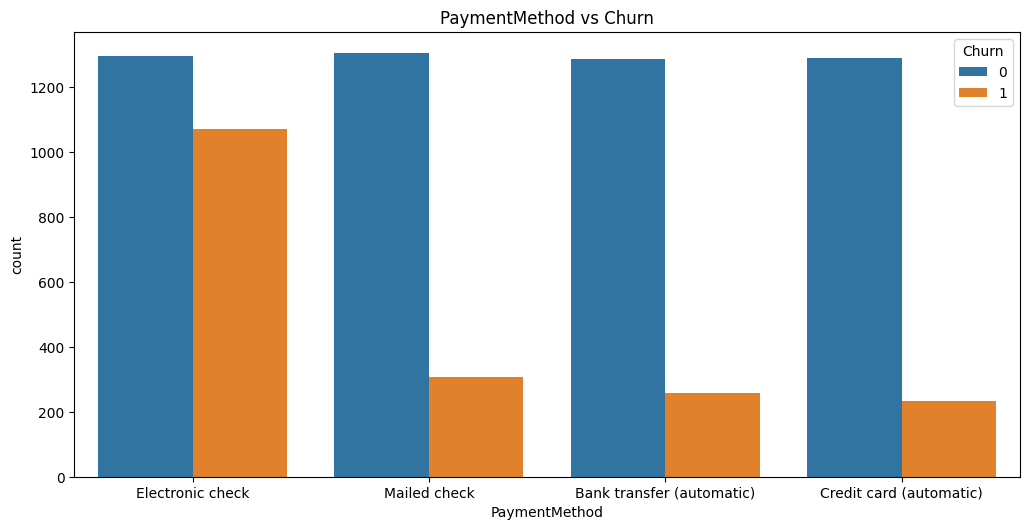

In [ ]:
## Separate viz for payment methods since they have multipel categories
plt.figure(figsize=(20, 10))


# Plotting the PaymentMethod variables against Churn
for i, col in enumerate(payment_columns):
    plt.subplot(2, 2, i + 1)
    sns.countplot(x=col, hue='Churn', data=df)
    plt.title(f'{col} vs Churn')

plt.tight_layout()
plt.show()


## Let's run a statistical test to see if there are any significant differences in distributions across categories.



In [ ]:
from scipy.stats import chi2_contingency

# Function to perform Chi-Square test on categorical features
def chi_square_test(df, col):
    contingency_table = pd.crosstab(df[col], df['Churn'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    return p

# Perform Chi-Square test on all categorical columns
chi_square_results = {col: chi_square_test(df, col) for col in all_categorical_columns}

# Filter significant results (p < 0.05)
significant_results = {col: p for col, p in chi_square_results.items() if p < 0.05}

significant_results


{'Partner': 2.1399113440759935e-36,
 'Dependents': 4.9249216612154196e-43,
 'MultipleLines': 0.0034643829548773,
 'InternetService': 9.571788222840544e-160,
 'OnlineSecurity': 2.661149635176552e-185,
 'OnlineBackup': 2.0797592160864276e-131,
 'DeviceProtection': 5.505219496457244e-122,
 'TechSupport': 1.4430840279998987e-180,
 'StreamingTV': 5.528994485739183e-82,
 'StreamingMovies': 2.667756755723681e-82,
 'Contract': 5.863038300673391e-258,
 'PaperlessBilling': 4.073354668665985e-58,
 'PaymentMethod': 3.6823546520097993e-140}

We can see quite a few variables have some significant differences in distributions for customers who churned and who didn't.

Let's summarize what we have found so far.

# Exploratory Data Analysis (EDA) Findings:

- **Contract Type and Tenure**:
  - **Month-to-month** contracts have the highest churn rates, while longer-term contracts (one or two years) reduce churn significantly.
  - Customers with longer tenure are more loyal and less likely to leave, reinforcing the importance of securing long-term commitments.

- **Cost Factors**:
  - Higher **Monthly Charges** are a strong driver of churn, whereas total accumulated costs (**Total Charges**) don't show a strong correlation. Customers seem sensitive to ongoing costs rather than long-term spending.

- **Services and Add-ons**:
  - Lack of services like **OnlineSecurity**, **TechSupport**, and **DeviceProtection** correlates with higher churn.  People who are buying services beyond standard neccessary ones are likely to stay with the product more.
  - Streaming services like **StreamingTV** and **StreamingMovies** are not as significant, but those who do not use these services are somewhat more likely to churn.

- **Demographics and Relationships**:
  - Customers without a **partner** or **dependents** are more likely to churn. Household dynamics could play a role in service stability, with those in more stable environments (e.g., with a partner or dependents) less likely to switch providers.

- **Billing and Payment Methods**:
  - **Electronic check** users churn far more often than those using **automatic bank transfers** or **credit cards**. Simplifying payment methods or promoting auto-pay options could help retention.
  - Interestingly, customers using **paperless billing** churn more frequently.




# Checking for assumption for each model.

## Linear Regression Assumption.

* Linearity: The relationship between the independent and dependent variables must be linear.
* Independence: Observations must be independent of each other.
* Homoscedasticity: The variance of residuals should remain constant across all levels of the independent variables.
* Normality: The residuals must be normally distributed.
* No Multicollinearity: Predictor variables should not be highly correlated.
* No Autocorrelation: There should be no correlation between residuals.
* No Endogeneity: The independent variables should not be correlated with the error term.
* Correct Specification: The model should include all relevant variables and be correctly formulated.

**For the simplicity we will start with the model with just continious variables**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Define the features (X) and target (y)
X = df[['tenure', 'MonthlyCharges', 'TotalCharges']]  # Numeric features
y = df['Churn']  # Churn as continuous variable

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predict on the test set
y_pred = linear_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
coefficients = linear_model.coef_
intercept = linear_model.intercept_

mse, r2, coefficients, intercept


(0.14403070447518657,
 0.2600395907874097,
 array([-2.78644804e-03,  6.94630655e-03, -7.34066157e-05]),
 0.07323912710430511)

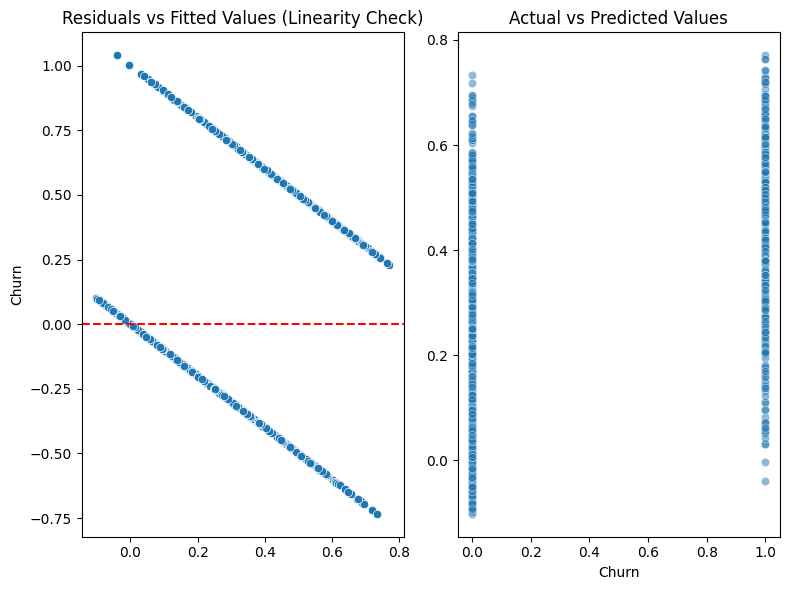

In [ ]:
# Checking linearity and multicollinearity

# Linearity check using residual plots and actual vs predicted values plot
plt.figure(figsize=(8, 6))

# Residuals plot to check for linearity (fitted values vs residuals)
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_pred, y=(y_test - y_pred))
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Fitted Values (Linearity Check)')

# Actual vs Predicted values
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.title('Actual vs Predicted Values')

plt.tight_layout()
plt.show()


In [ ]:
# Multicollinearity check using VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

vif_data


,feature,VIF
0,tenure,6.411602
1,MonthlyCharges,3.395187
2,TotalCharges,8.172729


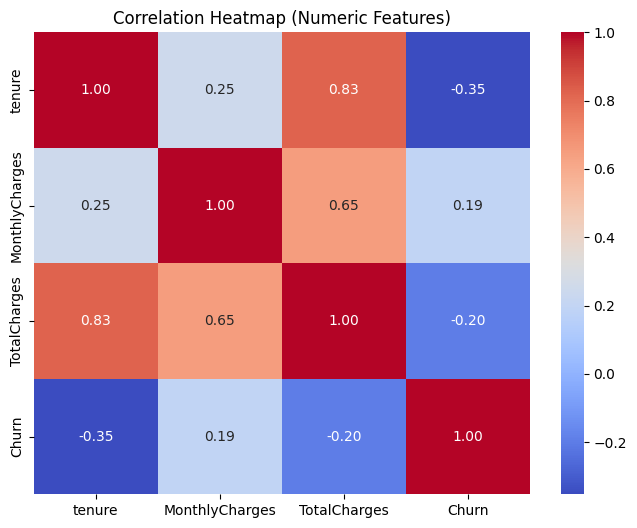

In [ ]:
# Multicollinearity via corr-map

numeric_features = ['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']

# Linearity check using correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df[numeric_features].corr(), annot=True, cmap="coolwarm", fmt='.2f')
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()

**As expected total charges and montly charges and tenure are hugely correlated since they all provide same information - how much the customer is paying over time**

Assumption Check Results for Linear Regression:

**Linearity:**

The Residuals vs Fitted Values plot shows a clear pattern, suggesting that the linearity assumption might be violated. The relationship between the predictors and churn does not seem perfectly linear.

**Multicollinearity:**
The VIF values show multicollinearity, particularly for tenure (VIF = 6.41) and TotalCharges (VIF = 8.17), which exceed the acceptable threshold of 5.

### Check Homoscedasticity and Normality of Residuals

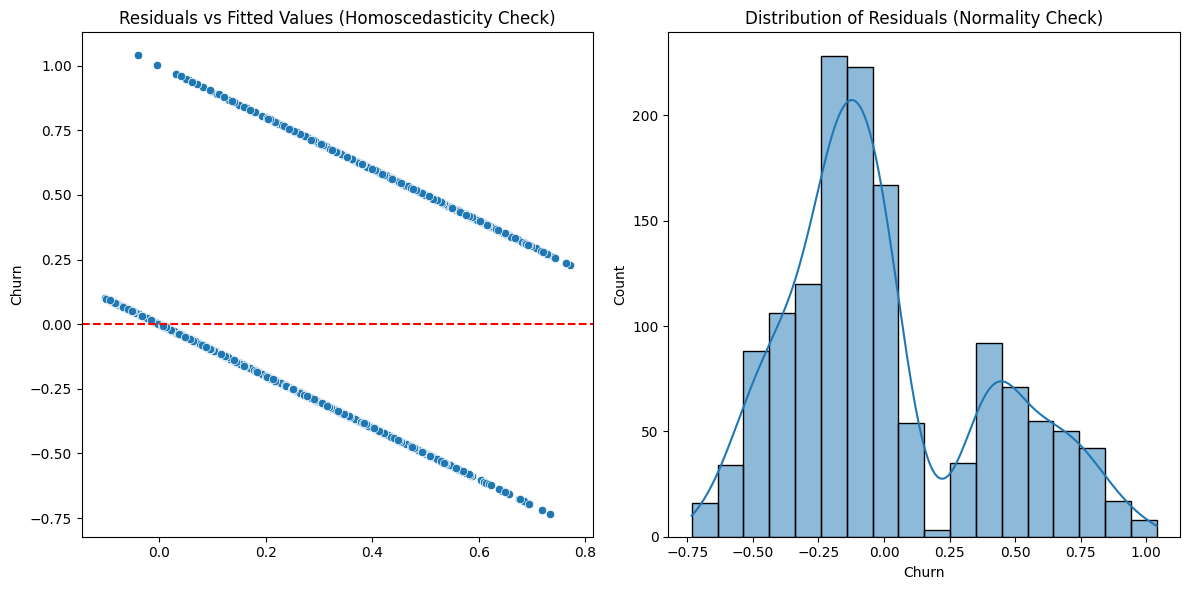

ShapiroResult(statistic=0.9338971943178517, pvalue=1.672611335237559e-24)

In [ ]:
# Check homoscedasticity and normality of residuals
import scipy.stats as stats

# Residuals
residuals = y_test - y_pred

plt.figure(figsize=(12, 6))

# Homoscedasticity: Residuals vs Fitted Values plot
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Fitted Values (Homoscedasticity Check)')

# Normality: Residuals histogram with KDE plot
plt.subplot(1, 2, 2)
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals (Normality Check)')

plt.tight_layout()
plt.show()

# Shapiro-Wilk test for normality
shapiro_test = stats.shapiro(residuals)
shapiro_test


Homoscedasticity and Normality Check Results:

**Homoscedasticity:**

The Residuals vs Fitted Values plot shows a clear pattern, indicating potential heteroscedasticity (i.e., the variance of residuals is not constant across all fitted values).
Normality:

The Residuals Distribution plot shows some deviations from normality, particularly at the extremes.


### The model defined just with continious variables isn't correctly specified and violates multiple assumptions so let's move on to a better specified model.

In [ ]:
# ## Convert categorical variables to machine readable and dummies
# df['gender'] = df['gender'].map(lambda x: {'Female': 1, 'Male': 0}[x.strip()])
# df.Partner = df.Partner.map({'Yes':1, "No":0})
# df.Dependents = df.Dependents.map({'Yes':1, "No":0})
# df['PhoneService'] = df['PhoneService'].map(lambda x: {'Yes': 1, 'No': 0}[x.strip()])
# df['MultipleLines'] = df['MultipleLines'].map(lambda x: {'Yes': 1, 'No': 0, 'No phone service':2}[x.strip()])
# df['InternetService'] = df['InternetService'].map(lambda x: {'DSL': 1, 'No': 0, 'Fiber optic':2}[x.strip()])
# df['OnlineSecurity'] = df['OnlineSecurity'].map(lambda x: {'Yes': 1, 'No': 0, 'No internet service':2}[x.strip()])
# df['OnlineBackup'] = df['OnlineBackup'].map(lambda x: {'Yes': 1, 'No': 0, 'No internet service':2}[x.strip()])
# df['DeviceProtection'] = df['DeviceProtection'].map(lambda x: {'Yes': 1, 'No': 0, 'No internet service':2}[x.strip()])
# df['TechSupport'] = df['TechSupport'].map(lambda x: {'Yes': 1, 'No': 0, 'No internet service':2}[x.strip()])
# df['StreamingTV'] = df['StreamingTV'].map(lambda x: {'Yes': 1, 'No': 0, 'No internet service':2}[x.strip()])
# df['StreamingMovies'] = df['StreamingMovies'].map(lambda x: {'Yes': 1, 'No': 0, 'No internet service':2}[x.strip()])
# df['Contract'] = df['Contract'].map(lambda x: {'Month-to-month': 1, 'One year': 0, 'Two year':2}[x.strip()])
# df['PaperlessBilling'] = df['PaperlessBilling'].map(lambda x: {'Yes': 1, 'No': 0}[x.strip()])
# df['PaymentMethod'] = df.PaymentMethod

# df = pd.get_dummies(df, columns=['PaymentMethod'], drop_first=True)


# df['Churn'] = df['Churn'].map(lambda x: {'Yes': 1, 'No': 0}[x.strip()])


In [ ]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'MonthlyCharges', 'TotalCharges', 'Churn',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [ ]:
df.shape

(7043, 23)

## Specified linear model

For multiple categories let's make more dummies.


In [ ]:
### At this point, easier to re-read the data since we didn't exclude anything yet.
df = pd.read_csv('https://raw.githubusercontent.com/Nastiiasaenko/Week-3XAI/refs/heads/main/WA_Fn-UseC_-Telco-Customer-Churn.csv')


Let's create a more specified dataset for linear model.

In [ ]:
df_linmodel = df.copy()

In [ ]:
# Convert categorical variables to machine-readable and dummies
df_linmodel['gender'] = df_linmodel['gender'].map(lambda x: {'Female': 1, 'Male': 0}[x.strip()])
df_linmodel.Partner = df_linmodel.Partner.map({'Yes': 1, "No": 0})
df_linmodel.Dependents = df_linmodel.Dependents.map({'Yes': 1, "No": 0})
df_linmodel['PhoneService'] = df_linmodel['PhoneService'].map(lambda x: {'Yes': 1, 'No': 0}[x.strip()])
df_linmodel['InternetService'] = df_linmodel['InternetService'].map(lambda x: {'DSL': 1, 'Fiber optic': 1,'No':0}[x.strip()])


# Simplifying add-ons: Keep only "Yes" as 1, treat all else (No, No internet service) as 0
df_linmodel['OnlineSecurity'] = df_linmodel['OnlineSecurity'].map(lambda x: 1 if x.strip() == 'Yes' else 0)
df_linmodel['OnlineBackup'] = df_linmodel['OnlineBackup'].map(lambda x: 1 if x.strip() == 'Yes' else 0)
df_linmodel['DeviceProtection'] = df_linmodel['DeviceProtection'].map(lambda x: 1 if x.strip() == 'Yes' else 0)
df_linmodel['TechSupport'] = df_linmodel['TechSupport'].map(lambda x: 1 if x.strip() == 'Yes' else 0)
df_linmodel['StreamingTV'] = df_linmodel['StreamingTV'].map(lambda x: 1 if x.strip() == 'Yes' else 0)
df_linmodel['StreamingMovies'] = df_linmodel['StreamingMovies'].map(lambda x: 1 if x.strip() == 'Yes' else 0)
df_linmodel['MultipleLines'] = df_linmodel['MultipleLines'].map(lambda x: 1 if x.strip() == 'Yes' else 0)

# Keep Contract, InternetService, and PaymentMethod in their multi-category format for one-hot encoding

df_linmodel['PaperlessBilling'] = df_linmodel['PaperlessBilling'].map(lambda x: {'Yes': 1, 'No': 0}[x.strip()])

# One-hot encode for PaymentMethod, InternetService, and Contract
df_linmodel = pd.get_dummies(df_linmodel, columns=['PaymentMethod', 'Contract'])
# df_linmodel = pd.get_dummies(df_linmodel, columns=[ 'InternetService'], drop_first=True)

# Convert Churn to binary
df_linmodel['Churn'] = df['Churn'].map(lambda x: {'Yes': 1, 'No': 0}[x.strip()])


In [ ]:
df_linmodel['TotalCharges'] = pd.to_numeric(df_linmodel['TotalCharges'], errors='coerce').fillna(0)

df_linmodel = df_linmodel.drop(columns=[ 'customerID'])

## Reassesing multi-collinearity

In [ ]:
df_linmodel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7043 non-null   int64  
 1   SeniorCitizen                            7043 non-null   int64  
 2   Partner                                  7043 non-null   int64  
 3   Dependents                               7043 non-null   int64  
 4   tenure                                   7043 non-null   int64  
 5   PhoneService                             7043 non-null   int64  
 6   MultipleLines                            7043 non-null   int64  
 7   InternetService                          7043 non-null   int64  
 8   OnlineSecurity                           7043 non-null   int64  
 9   OnlineBackup                             7043 non-null   int64  
 10  DeviceProtection                         7043 no

# LINEAR REGRESSION ASSUMPTIONS CHECK

## Linearity - let's assess each features relationship.

## We can asses that only for numeric features - tenure, monthly charges, total charges.

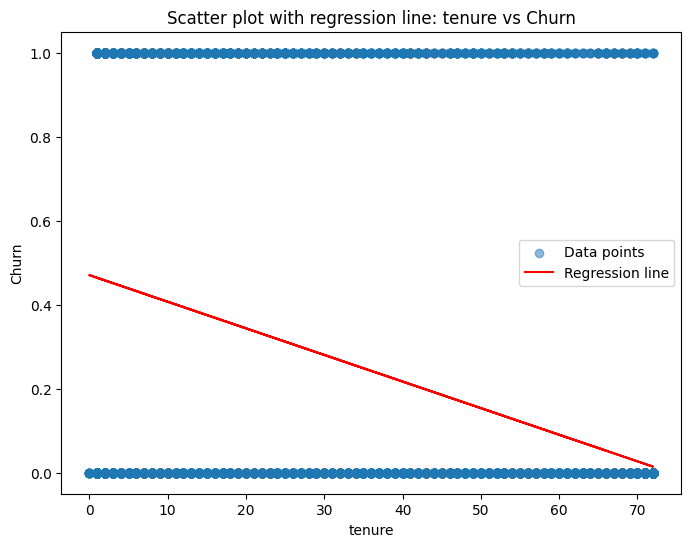

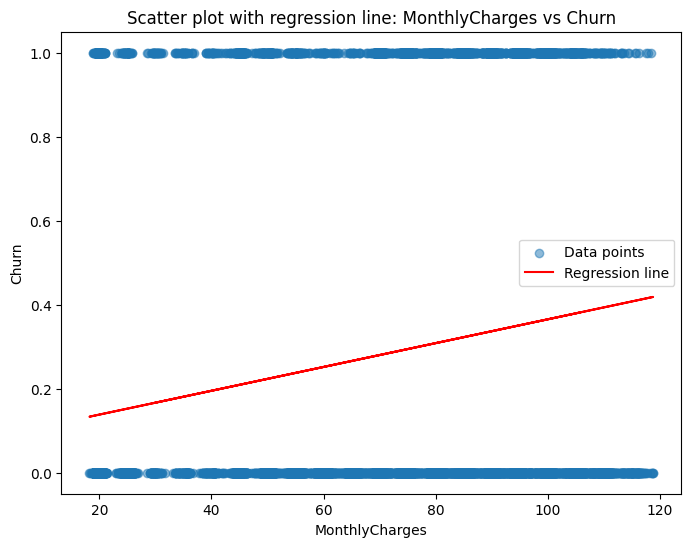

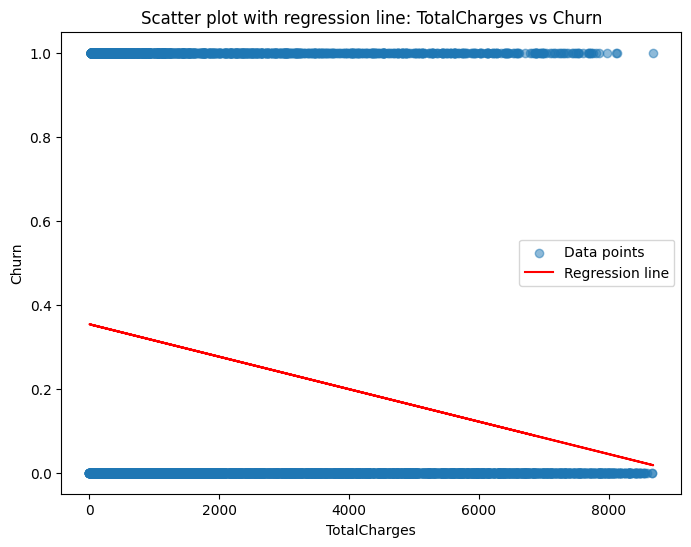

In [ ]:
# First, we'll extract only the numeric continuous variables for analysis
# We already know 'Churn' is binary, so we'll plot the numeric continuous features with 'Churn'

numeric_features = ['tenure', 'MonthlyCharges', 'TotalCharges']  # Continuous numeric features
target = 'Churn'

# Import linear regression for plotting regression lines
from sklearn.linear_model import LinearRegression
import numpy as np

# Function to plot scatter plot with regression line
def plot_scatter_with_regression(x, y, feature_name):
    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, alpha=0.5, label='Data points')

    # Fit a linear regression model for the feature and target
    model = LinearRegression().fit(x.values.reshape(-1, 1), y)
    predicted = model.predict(x.values.reshape(-1, 1))

    # Plot regression line
    plt.plot(x, predicted, color='red', label='Regression line')
    plt.title(f'Scatter plot with regression line: {feature_name} vs Churn')
    plt.xlabel(feature_name)
    plt.ylabel('Churn')
    plt.legend()
    plt.show()

# Iterate through each numeric feature to plot scatter plots with regression line
for feature in numeric_features:
    plot_scatter_with_regression(df_linmodel[feature], df_linmodel[target], feature)


## Since the target variable is binary the assumption doesn't make much sense.

### Linear Regression Model Specification


In [ ]:
df_linmodel = df_linmodel.astype({col: int for col in df_linmodel.select_dtypes(include='bool').columns})



In [ ]:
X = df_linmodel.drop(columns='Churn')
y = df_linmodel['Churn']

In [ ]:
X = sm.add_constant(X)

In [ ]:
# Fit the linear regression model
lin_model = sm.OLS(y, X).fit()

# Get the summary of the model to assess the coefficients and p-values
lin_model_summary = lin_model.summary()
lin_model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Churn   R-squared:                       0.284
Model:                            OLS   Adj. R-squared:                  0.282
Method:                 Least Squares   F-statistic:                     126.4
Date:                Tue, 24 Sep 2024   Prob (F-statistic):               0.00
Time:                        01:06:48   Log-Likelihood:                -3060.5
No. Observations:                7043   AIC:                             6167.
Df Residuals:                    7020   BIC:                             6325.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                       0.1150      0.017      6.947      0.000       0.083       0.147
gender                                      0.0035      0.009      0.392      0.695      -0.014       0.021
SeniorCitizen                               0.0444      0.013      3.414      0.001       0.019       0.070
Partner                                    -0.0009      0.011     -0.079      0.937      -0.022       0.020
Dependents                                 -0.0211      0.011     -1.845      0.065      -0.044       0.001
tenure                                     -0.0019      0.000     -3.790      0.000      -0.003      -0.001
PhoneService                               -0.1701      0.023     -7.318      0.000      -0.216      -0.125
MultipleLines                               0.0166      0.011      1.456      0.145      -0.006       0.039
InternetService                            -0.0273      0.025     -1.089      0.276      -0.077       0.022
OnlineSecurity                             -0.0849      0.012     -7.227      0.000      -0.108      -0.062
OnlineBackup                               -0.0534      0.011     -4.673      0.000      -0.076      -0.031
DeviceProtection                           -0.0376      0.012     -3.182      0.001      -0.061      -0.014
TechSupport                                -0.0862      0.012     -7.215      0.000      -0.110      -0.063
StreamingTV                                -0.0194      0.013     -1.468      0.142      -0.045       0.007
StreamingMovies                            -0.0164      0.013     -1.246      0.213      -0.042       0.009
PaperlessBilling                            0.0453      0.010      4.543      0.000       0.026       0.065
MonthlyCharges                              0.0070      0.001     12.609      0.000       0.006       0.008
TotalCharges                            -4.441e-05   6.46e-06     -6.870      0.000   -5.71e-05   -3.17e-05
PaymentMethod_Bank transfer (automatic)     0.0148      0.010      1.525      0.127      -0.004       0.034
PaymentMethod_Credit card (automatic)       0.0090      0.010      0.935      0.350      -0.010       0.028
PaymentMethod_Electronic check              0.0831      0.009      8.862      0.000       0.065       0.101
PaymentMethod_Mailed check                  0.0080      0.009      0.892      0.372      -0.010       0.026
Contract_Month-to-month                     0.0985      0.010     10.295      0.000       0.080       0.117
Contract_One year                          -0.0088      0.010     -0.910      0.363      -0.028       0.010
Contract_Two year                           0.0252      0.012      2.163      0.031       0.002       0.048
===========================================================